# Importing libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import ast
import spacy
import string
import re
import nltk
import ast
import gensim
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import beta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_hist(data):
    plt.figure(figsize=(15, 7))
    weights = np.ones_like(data)/float(len(data))
    plt.hist(data, weights=weights)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid()

In [3]:
def check_lookup(key):
    return models.lookup[str(np.array(key))]

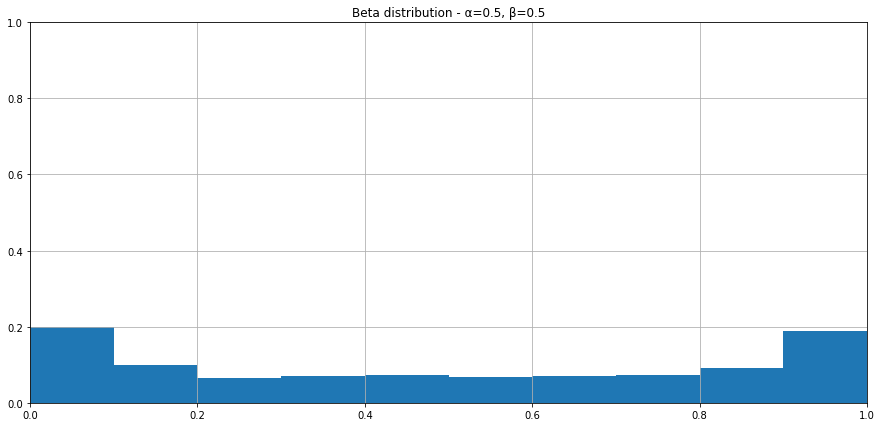

In [4]:
np.random.seed(seed=142)
plot_hist(beta.rvs(0.5,0.5, size=500))
plt.title("Beta distribution - α=0.5, β=0.5")
plt.show()

# Importing selected models

In [5]:
fullname = "selected_models/15.02.2021_19.22/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [6]:
models.all_memberships

{0: array([0.        , 0.94993785, 0.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 0.95476457, 0.66029929,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 0.93398064, 0.        , 0.83511801, 1.        ,
        0.96337112, 0.        , 0.98916792, 0.40984004, 0.        ,
        0.        , 1.        , 0.64372504, 0.75316714, 1.        ,
        1.        , 0.        , 1.        , 0.6572594 , 0.24026178,
        0.6747979 , 0.        , 0.        , 0.35485268, 0.92637961,
        1.        , 1.        , 0.6724157 , 0.57107442, 1.        ,
        1.        , 1.        , 0.        , 0.        , 0.4712143 ,
        0.49977973, 0.85934588, 0.01655138, 0.        , 1.        ,
        1.        , 1.        , 0.92093627, 0.80104398, 0.        ,
        0.57190957, 0.64771947, 1.        , 0.76696907, 0.52064204,
        0.0915081 , 0.84082543, 0.59159131, 0.        , 0.17078926,
        0.2144975 , 0.29256833, 0.51159268, 0

In [7]:
models.all_labels

{0: array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1]),
 1: array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 

In [8]:
models.folds

{'x train 0': array([[-0.01441392, -0.10607319,  0.13959101, ..., -0.47229767,
         -0.81155527, -1.696571  ],
        [ 1.1536664 , -0.52283365,  0.23984915, ..., -0.06834348,
         -0.593689  , -1.6828862 ],
        [ 0.51061547, -0.30448598,  0.05837453, ..., -0.26973838,
         -0.64728653, -1.6157067 ],
        ...,
        [ 0.04398141, -0.14772558,  0.08373658, ..., -0.40792245,
         -0.7545122 , -1.5625297 ],
        [ 0.24375743, -0.22606952,  0.15840834, ..., -0.4442089 ,
         -0.7450505 , -1.6644311 ],
        [ 0.22351599, -0.24385267,  0.11266948, ..., -0.37311396,
         -0.7280553 , -1.5498468 ]]),
 'y train 0': array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1

In [9]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [10]:
memberships[0:10]

,0
0,0.000000
1,0.949938
2,0.000000
3,1.000000
4,1.000000
5,1.000000
6,0.000000
7,1.000000
8,0.954765
9,0.660299


In [11]:
all_training_memberships = models.all_training_memberships
training_memberships = []

for i in range(0,5):
    for j in all_training_memberships[i]:
        training_memberships.append(j)
        
training_memberships = pd.DataFrame(training_memberships)

In [12]:
training_memberships[0:10]

,0
0,0.287960
1,1.000000
2,0.828339
3,1.000000
4,0.730091
5,1.000000
6,0.280728
7,0.000000
8,0.092109
9,0.965064


In [13]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [14]:
labels[0:10]

,0
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,0


## Retrieve expected memberships

In [15]:
PATH_TEXTS = "generated_datasets/15.02.2021_18.37/generated_dataset_500.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

In [16]:
all_memberships = models.all_memberships
all_folds = models.folds
memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_memberships[i], all_folds["x test " + str(i)]):
        memberships.append(j)
        folds.append(k)

In [17]:
total_data = pd.DataFrame(folds)
total_data["x"] = total_data.values.tolist()
for i in range(0,len(total_data.columns) - 1):
    del total_data[i]

In [18]:
total_data["approximated memberships"] = memberships
total_data

,x,approximated memberships
0,"[-0.34720156, -0.039916515, 0.022396622, -0.90...",0.000000
1,"[0.8107968, -0.35841808, 0.08431917, -1.117565...",0.949938
2,"[-0.36405396, -0.023216592, 0.08077917, -0.957...",0.000000
3,"[1.1056526, -0.43327454, 0.16043246, -1.185780...",1.000000
4,"[1.0440328, -0.43780527, 0.15556355, -1.193000...",1.000000
...,...,...
495,"[0.954549, -0.42374918, 0.17583874, -1.1646838...",1.000000
496,"[-0.3286908, -0.02454337, 0.1341829, -0.950980...",0.000000
497,"[0.04398141, -0.14772558, 0.08373658, -1.02854...",0.382468
498,"[0.24375743, -0.22606952, 0.15840834, -1.08732...",0.489182


In [19]:
total_data["expected memberships"] = dataset["membership"]

In [20]:
total_data

,x,approximated memberships,expected memberships
0,"[-0.34720156, -0.039916515, 0.022396622, -0.90...",0.000000,0.037611
1,"[0.8107968, -0.35841808, 0.08431917, -1.117565...",0.949938,0.714107
2,"[-0.36405396, -0.023216592, 0.08077917, -0.957...",0.000000,0.015317
3,"[1.1056526, -0.43327454, 0.16043246, -1.185780...",1.000000,0.917464
4,"[1.0440328, -0.43780527, 0.15556355, -1.193000...",1.000000,0.860149
...,...,...,...
495,"[0.954549, -0.42374918, 0.17583874, -1.1646838...",1.000000,0.912895
496,"[-0.3286908, -0.02454337, 0.1341829, -0.950980...",0.000000,0.055598
497,"[0.04398141, -0.14772558, 0.08373658, -1.02854...",0.382468,0.328889
498,"[0.24375743, -0.22606952, 0.15840834, -1.08732...",0.489182,0.347384


In [21]:
all_training_memberships = models.all_training_memberships
all_folds = models.folds
training_memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_training_memberships[i], all_folds["x train " + str(i)]):
        training_memberships.append(j)
        folds.append(k)

In [22]:
total_training_data = pd.DataFrame(folds)
total_training_data["x"] = total_training_data.values.tolist()
for i in range(0,len(total_training_data.columns) - 1):
    del total_training_data[i]

In [23]:
total_training_data["approximated memberships"] = training_memberships
total_training_data

,x,approximated memberships
0,"[-0.014413921, -0.10607319, 0.13959101, -1.021...",0.287960
1,"[1.1536664, -0.52283365, 0.23984915, -1.154345...",1.000000
2,"[0.51061547, -0.30448598, 0.058374528, -1.1349...",0.828339
3,"[1.1188524, -0.58226705, 0.067615174, -1.22435...",1.000000
4,"[0.39512375, -0.1977417, 0.059064995, -1.07967...",0.730091
...,...,...
1995,"[1.2333558, -0.5195238, 0.12580368, -1.1988256...",1.000000
1996,"[1.1288364, -0.5142945, 0.14097463, -1.1592481...",1.000000
1997,"[1.2044182, -0.48902062, 0.14982484, -1.207688...",1.000000
1998,"[0.7668931, -0.37293333, 0.093998775, -1.10761...",0.902053


In [24]:
total_training_data["x"] = total_training_data["x"].apply(lambda s: tuple(s))
total_training_data

,x,approximated memberships
0,"(-0.014413921, -0.10607319, 0.13959101, -1.021...",0.287960
1,"(1.1536664, -0.52283365, 0.23984915, -1.154345...",1.000000
2,"(0.51061547, -0.30448598, 0.058374528, -1.1349...",0.828339
3,"(1.1188524, -0.58226705, 0.067615174, -1.22435...",1.000000
4,"(0.39512375, -0.1977417, 0.059064995, -1.07967...",0.730091
...,...,...
1995,"(1.2333558, -0.5195238, 0.12580368, -1.1988256...",1.000000
1996,"(1.1288364, -0.5142945, 0.14097463, -1.1592481...",1.000000
1997,"(1.2044182, -0.48902062, 0.14982484, -1.207688...",1.000000
1998,"(0.7668931, -0.37293333, 0.093998775, -1.10761...",0.902053


In [25]:
total_training_data = total_training_data.drop_duplicates(subset=['x'])

In [26]:
dataset["text"] = dataset["text"].apply(lambda s: ast.literal_eval(s))
dataset["text"] = dataset["text"].apply(lambda s: tuple(s))
dataset

,index,old index,text,membership
0,0,361,"(-0.34720156, -0.039916515, 0.022396622, -0.90...",0.037611
1,1,73,"(0.8107968, -0.35841808, 0.08431917, -1.117565...",0.714107
2,2,374,"(-0.36405396, -0.023216592, 0.08077917, -0.957...",0.015317
3,3,155,"(1.1056526, -0.43327454, 0.16043246, -1.185780...",0.917464
4,4,104,"(1.0440328, -0.43780527, 0.15556355, -1.193000...",0.860149
...,...,...,...,...
495,495,106,"(0.954549, -0.42374918, 0.17583874, -1.1646838...",0.912895
496,496,270,"(-0.3286908, -0.02454337, 0.1341829, -0.950980...",0.055598
497,497,348,"(0.04398141, -0.14772558, 0.08373658, -1.02854...",0.328889
498,498,435,"(0.24375743, -0.22606952, 0.15840834, -1.08732...",0.347384


In [27]:
counter = 0
original_training_data_positions = []

for i in total_training_data.iterrows():
    for j in dataset.iterrows():
        if i[1]["x"] == j[1]["text"]:
            original_training_data_positions.append(j[0])

In [28]:
original_training_data = []

for i in original_training_data_positions:
    original_training_data.append(dataset["membership"].iloc[i])

In [29]:
total_training_data["expected memberships"] = original_training_data
total_training_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,approximated memberships,expected memberships
0,"(-0.014413921, -0.10607319, 0.13959101, -1.021...",0.287960,0.248482
1,"(1.1536664, -0.52283365, 0.23984915, -1.154345...",1.000000,0.952953
2,"(0.51061547, -0.30448598, 0.058374528, -1.1349...",0.828339,0.604362
3,"(1.1188524, -0.58226705, 0.067615174, -1.22435...",1.000000,0.985516
4,"(0.39512375, -0.1977417, 0.059064995, -1.07967...",0.730091,0.503814
...,...,...,...
495,"(-0.32799384, -0.0059212493, 0.18757287, -0.96...",0.000000,0.000529
496,"(-0.3508204, 0.04678118, 0.17859206, -0.865210...",0.000000,0.002719
497,"(0.83181953, -0.37056294, 0.06274945, -1.17851...",0.963106,0.751905
498,"(-0.25827336, -0.0413355, 0.18278351, -1.03512...",0.000000,0.004675


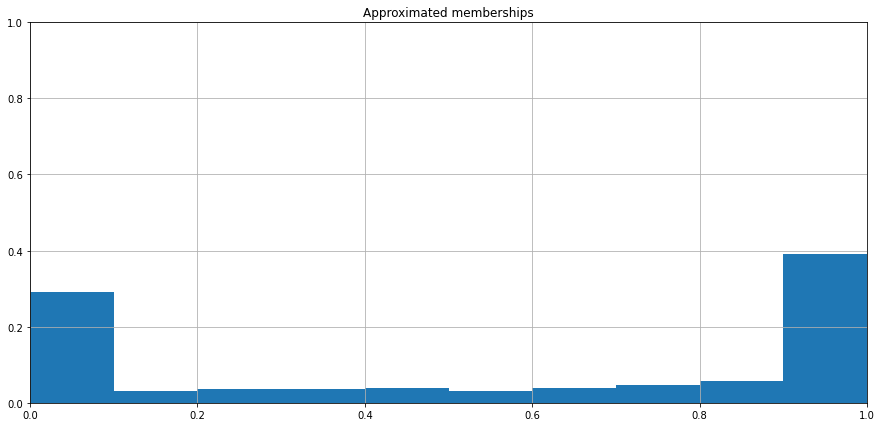

In [30]:
plot_hist(total_data["approximated memberships"])

plt.title("Approximated memberships")
plt.show()

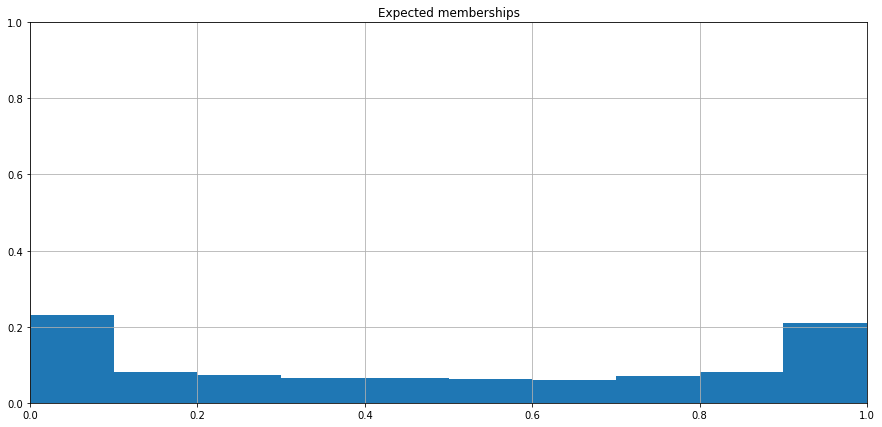

In [31]:
plot_hist(total_data["expected memberships"])

plt.title("Expected memberships")
plt.show()

In [32]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

def RMSE(prediction, y):
    loss = square_loss(prediction, y)
    return np.sqrt(1/len(loss) * sum(loss))

Training error

In [33]:
RMSE(total_training_data["approximated memberships"], total_training_data["expected memberships"])

0.13004857387630958

Test error

In [34]:
RMSE(total_data["approximated memberships"], total_data["expected memberships"])

0.21666140172685602

In [35]:
def select_radius(radius, threshold):
    special_range = [(approx[1], approx[2]) for x, approx in total_data.iterrows() if approx[1] <= threshold + radius and approx[1] >= threshold - radius]
    return special_range

In [36]:
for i in select_radius(0.15, 0.5):
    print(i)

(0.4098400406876319, 0.2891140531240472)
(0.6437250376159164, 0.4474877039626815)
(0.35485267901417095, 0.26144146494153786)
(0.5710744163116503, 0.4178746172988474)
(0.4712142993755859, 0.35972126181225983)
(0.49977973314454205, 0.3684710567543247)
(0.5719095653872115, 0.4071493632238521)
(0.6477194735625911, 0.4522052676546085)
(0.5206420436866885, 0.34884703901605235)
(0.5915913060692216, 0.4500382152467894)
(0.5115926757846905, 0.3727303245689951)
(0.4998235100695636, 0.3556416415440101)
(0.4764451728771866, 0.357575825465326)
(0.4343835737010009, 0.3309154484047805)
(0.6075319937089256, 0.4317713256443565)
(0.3731172456131423, 0.2762349417956152)
(0.3647900318582543, 0.2766616929839005)
(0.3915956565604265, 0.3154044115719357)
(0.5550045635897332, 0.3823679670982088)
(0.6007843141652576, 0.4140628729840509)
(0.577798326601265, 0.38221936114096106)
(0.6493956278291597, 0.4444099225623518)
(0.5350515921229986, 0.4104228735541527)
(0.4237489620199313, 0.3249375176244919)
(0.373984301

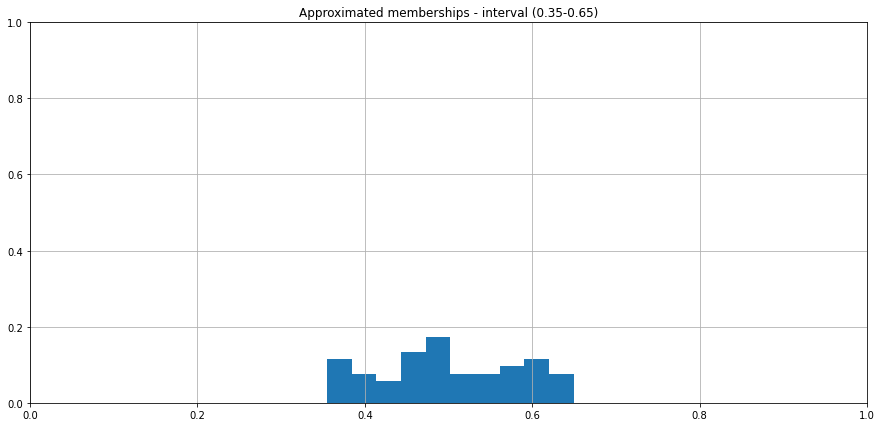

In [37]:
plot_hist([x[0] for x in select_radius(0.15, 0.5)])

plt.title("Approximated memberships - interval (0.35-0.65)")
plt.show()

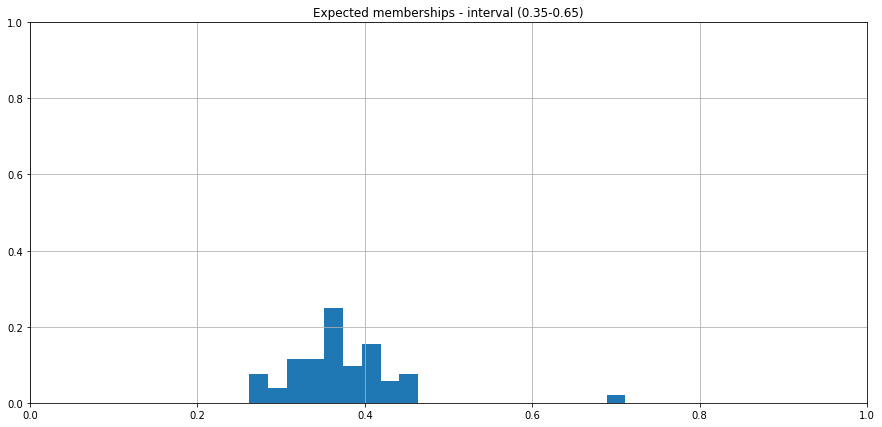

In [38]:
data = [x[1] for x in select_radius(0.15, 0.5)]
plt.figure(figsize=(15, 7))
weights = np.ones_like(data)/float(len(data))
binwidth = (max(data) - min(data)) / 10
plt.hist(data, bins=20, weights=weights)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Expected memberships - interval (0.35-0.65)")
plt.grid()

In [39]:
recap = pd.DataFrame([[x[0], x[1]] for x in select_radius(0.15, 0.5)], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.14806097046170275

# Baseline (Random Forest)

In [40]:
best_grid = [
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=300, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42)
]

In [41]:
# random_forest = RandomForestRegressor(random_state=42)

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# best_grid = []

# rf_pred_train = []
# rf_pred_test = []

# rf_scores_train = []
# rf_scores_test = []

training_predictions = []
test_predictions = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    # Instantiate the grid search model
    # gs = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2)
    # gs.fit(X_train, y_train)
    
    # y_pred_train = gs.best_estimator_.predict(X_train)
    # y_pred_test = gs.best_estimator_.predict(X_test)
    
    # best_grid.append(gs.best_estimator_)
    # rf_pred_train.append(y_pred_train)
    # rf_pred_test.append(y_pred_test)
    
    # rf_scores_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    # rf_scores_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    best_grid[i].fit(X_train, y_train)
    
    training_predictions.append((best_grid[i].predict(X_train), X_train))
    test_predictions.append((best_grid[i].predict(X_test), X_test))
    
# print("Training error: ", np.mean(rf_scores_train))
# print("Test error: ", np.mean(rf_scores_test))

In [42]:
for i in best_grid:
    print(i.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 

In [43]:
baseline_train_predictions = []
baseline_test_predictions = []
baseline_train_data = []
baseline_test_data = []

for i in training_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_train_predictions.append(j)
        baseline_train_data.append(k)
        
for i in test_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_test_predictions.append(j)
        baseline_test_data.append(k)
        
baseline_train = pd.DataFrame(columns=["x", "baseline training memberships"])
baseline_train["x"] = baseline_train_data
baseline_train["baseline training memberships"] = baseline_train_predictions
baseline_train["x"] = baseline_train["x"].apply(lambda s: tuple(s))
baseline_train = baseline_train.drop_duplicates(subset=['x'])
baseline_train["expected memberships"] = total_training_data["expected memberships"]

baseline_test = pd.DataFrame(columns=["x", "baseline test memberships"])
baseline_test["x"] = baseline_test_data
baseline_test["baseline test memberships"] = baseline_test_predictions
baseline_test["x"] = baseline_test["x"].apply(lambda s: tuple(s))
baseline_test = baseline_test.drop_duplicates(subset=['x'])
baseline_test["expected memberships"] = total_data["expected memberships"]

Training error

In [44]:
RMSE(baseline_train["baseline training memberships"], baseline_train["expected memberships"])

0.21007468660987438

Test error

In [45]:
RMSE(baseline_test["baseline test memberships"], baseline_test["expected memberships"])

0.27084738984087986

In [46]:
special_range = [(base[1], base[2]) for x, base in baseline_test.iterrows() if base[1] <= 0.65 and base[1] >= 0.35]
recap = pd.DataFrame([[x[0], x[1]] for x in special_range], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.1893640535434518

# Importing selected models - overlay

In [47]:
fullname = "selected_models/25.02.2021_19.23/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [48]:
models.all_memberships

{0: array([0.04639581, 0.12115653, 0.42713852, 0.25079549, 0.18796343,
        0.9228887 , 1.        , 0.51933493, 0.        , 1.        ,
        1.        , 0.45345711, 0.14480999, 0.56110567, 0.        ,
        0.95409316, 0.8318027 , 0.        , 0.        , 0.        ,
        1.        , 0.9579044 , 0.11675443, 1.        , 0.        ,
        0.69931433, 0.78993386, 0.51560567, 0.        , 0.17830004,
        0.20724075, 1.        , 0.96024583, 0.        , 0.08015361,
        0.        , 0.26703923, 0.5105504 , 0.        , 0.        ,
        0.        , 0.        , 0.58192276, 0.88702152, 1.        ,
        0.        , 0.31273618, 1.        , 0.        , 0.03080417,
        0.21163025, 0.22353976, 0.65678602, 0.24390095, 0.7019457 ,
        1.        , 0.99692887, 1.        , 1.        , 0.8806871 ,
        0.        , 0.56231855, 0.        , 0.32402518, 0.39015505,
        0.94189633, 0.19572743, 1.        , 1.        , 0.14977355,
        1.        , 0.78846423, 0.25462143, 0

In [49]:
models.all_labels

{0: array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 

In [50]:
models.folds

{'x train 0': array([[ 0.23890609, -0.16335306,  0.12657966, ..., -0.12256333,
         -0.70903385, -1.9110523 ],
        [ 0.44952148, -0.26126415,  0.04878992, ..., -0.18040287,
         -0.69457364, -1.8800852 ],
        [ 0.3412027 , -0.20600133,  0.08627229, ..., -0.12929304,
         -0.6639996 , -1.8409859 ],
        ...,
        [ 0.94591916, -0.4035135 , -0.15208371, ..., -0.24117985,
         -0.6235329 , -1.6632015 ],
        [ 0.8011475 , -0.3740786 , -0.10840999, ..., -0.20547912,
         -0.60802   , -1.7075114 ],
        [ 0.71311885, -0.4120092 , -0.20846985, ..., -0.10596868,
         -0.5754151 , -1.7141259 ]]),
 'y train 0': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0

In [51]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [52]:
memberships[0:10]

,0
0,0.046396
1,0.121157
2,0.427139
3,0.250795
4,0.187963
5,0.922889
6,1.000000
7,0.519335
8,0.000000
9,1.000000


In [53]:
all_training_memberships = models.all_training_memberships
training_memberships = []

for i in range(0,5):
    for j in all_training_memberships[i]:
        training_memberships.append(j)
        
training_memberships = pd.DataFrame(training_memberships)

In [54]:
training_memberships[0:10]

,0
0,0.075400
1,0.388268
2,0.230334
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.489527
9,0.390054


In [55]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [56]:
labels[0:10]

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,1


## Retrieve expected memberships - overlay

In [57]:
PATH_TEXTS = "generated_datasets/25.02.2021_17.30/generated_dataset_500.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

In [58]:
all_memberships = models.all_memberships
all_folds = models.folds
memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_memberships[i], all_folds["x test " + str(i)]):
        memberships.append(j)
        folds.append(k)

In [59]:
total_data = pd.DataFrame(folds)
total_data["x"] = total_data.values.tolist()
for i in range(0,len(total_data.columns) - 1):
    del total_data[i]

In [60]:
total_data["approximated memberships"] = memberships
total_data

,x,approximated memberships
0,"[0.34789374, -0.15553573, 0.05080845, -0.98846...",0.046396
1,"[0.17054771, -0.1432889, -0.01291773, -0.99714...",0.121157
2,"[0.33422282, -0.16268589, -0.034640815, -1.038...",0.427139
3,"[0.26770538, -0.19401602, 0.034606315, -1.0567...",0.250795
4,"[0.3328332, -0.16277295, 0.024199277, -1.08324...",0.187963
...,...,...
495,"[0.8985767, -0.35373858, -0.086086504, -1.0857...",1.000000
496,"[0.9668735, -0.43837455, -0.2001448, -1.127462...",1.000000
497,"[0.94591916, -0.4035135, -0.15208371, -1.10169...",1.000000
498,"[0.8011475, -0.3740786, -0.108409986, -1.09580...",1.000000


In [61]:
total_data["expected memberships"] = dataset["membership"]

In [62]:
total_data

,x,approximated memberships,expected memberships
0,"[0.34789374, -0.15553573, 0.05080845, -0.98846...",0.046396,0.166915
1,"[0.17054771, -0.1432889, -0.01291773, -0.99714...",0.121157,0.160208
2,"[0.33422282, -0.16268589, -0.034640815, -1.038...",0.427139,0.336168
3,"[0.26770538, -0.19401602, 0.034606315, -1.0567...",0.250795,0.254036
4,"[0.3328332, -0.16277295, 0.024199277, -1.08324...",0.187963,0.310970
...,...,...,...
495,"[0.8985767, -0.35373858, -0.086086504, -1.0857...",1.000000,0.866598
496,"[0.9668735, -0.43837455, -0.2001448, -1.127462...",1.000000,0.969010
497,"[0.94591916, -0.4035135, -0.15208371, -1.10169...",1.000000,0.927823
498,"[0.8011475, -0.3740786, -0.108409986, -1.09580...",1.000000,0.946893


In [63]:
all_training_memberships = models.all_training_memberships
all_folds = models.folds
training_memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_training_memberships[i], all_folds["x train " + str(i)]):
        training_memberships.append(j)
        folds.append(k)

In [64]:
total_training_data = pd.DataFrame(folds)
total_training_data["x"] = total_training_data.values.tolist()
for i in range(0,len(total_training_data.columns) - 1):
    del total_training_data[i]

In [65]:
total_training_data["approximated memberships"] = training_memberships
total_training_data

,x,approximated memberships
0,"[0.23890609, -0.16335306, 0.12657966, -1.03973...",0.075400
1,"[0.44952148, -0.26126415, 0.048789915, -1.0753...",0.388268
2,"[0.3412027, -0.20600133, 0.08627229, -1.018536...",0.230334
3,"[0.04805377, -0.058805205, 0.077519014, -1.009...",0.000000
4,"[0.19245598, -0.16570613, 0.12893403, -1.04448...",0.000000
...,...,...
1995,"[0.9471821, -0.41386205, -0.08685796, -1.14934...",1.000000
1996,"[0.93421257, -0.3806933, -0.05724126, -1.12950...",1.000000
1997,"[0.8504269, -0.35901877, -0.0148792965, -1.092...",0.973245
1998,"[0.6941561, -0.337224, -0.17277026, -1.0663697...",0.881512


In [66]:
total_training_data["x"] = total_training_data["x"].apply(lambda s: tuple(s))
total_training_data

,x,approximated memberships
0,"(0.23890609, -0.16335306, 0.12657966, -1.03973...",0.075400
1,"(0.44952148, -0.26126415, 0.048789915, -1.0753...",0.388268
2,"(0.3412027, -0.20600133, 0.08627229, -1.018536...",0.230334
3,"(0.04805377, -0.058805205, 0.077519014, -1.009...",0.000000
4,"(0.19245598, -0.16570613, 0.12893403, -1.04448...",0.000000
...,...,...
1995,"(0.9471821, -0.41386205, -0.08685796, -1.14934...",1.000000
1996,"(0.93421257, -0.3806933, -0.05724126, -1.12950...",1.000000
1997,"(0.8504269, -0.35901877, -0.0148792965, -1.092...",0.973245
1998,"(0.6941561, -0.337224, -0.17277026, -1.0663697...",0.881512


In [67]:
total_training_data = total_training_data.drop_duplicates(subset=['x'])

In [68]:
dataset["text"] = dataset["text"].apply(lambda s: ast.literal_eval(s))
dataset["text"] = dataset["text"].apply(lambda s: tuple(s))
dataset

,index,old index,text,membership
0,0,361,"(0.34789374, -0.15553573, 0.05080845, -0.98846...",0.166915
1,1,73,"(0.17054771, -0.1432889, -0.01291773, -0.99714...",0.160208
2,2,374,"(0.33422282, -0.16268589, -0.034640815, -1.038...",0.336168
3,3,155,"(0.26770538, -0.19401602, 0.034606315, -1.0567...",0.254036
4,4,104,"(0.3328332, -0.16277295, 0.024199277, -1.08324...",0.310970
...,...,...,...,...
495,495,106,"(0.8985767, -0.35373858, -0.086086504, -1.0857...",0.866598
496,496,270,"(0.9668735, -0.43837455, -0.2001448, -1.127462...",0.969010
497,497,348,"(0.94591916, -0.4035135, -0.15208371, -1.10169...",0.927823
498,498,435,"(0.8011475, -0.3740786, -0.108409986, -1.09580...",0.946893


In [69]:
counter = 0
original_training_data_positions = []

for i in total_training_data.iterrows():
    for j in dataset.iterrows():
        if i[1]["x"] == j[1]["text"]:
            original_training_data_positions.append(j[0])

In [70]:
original_training_data = []

for i in original_training_data_positions:
    original_training_data.append(dataset["membership"].iloc[i])

In [71]:
total_training_data["expected memberships"] = original_training_data
total_training_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,approximated memberships,expected memberships
0,"(0.23890609, -0.16335306, 0.12657966, -1.03973...",0.075400,0.176768
1,"(0.44952148, -0.26126415, 0.048789915, -1.0753...",0.388268,0.369981
2,"(0.3412027, -0.20600133, 0.08627229, -1.018536...",0.230334,0.237541
3,"(0.04805377, -0.058805205, 0.077519014, -1.009...",0.000000,0.004283
4,"(0.19245598, -0.16570613, 0.12893403, -1.04448...",0.000000,0.126344
...,...,...,...
495,"(1.0105851, -0.40212712, -0.09583855, -1.09508...",1.000000,0.994394
496,"(0.5691632, -0.35646054, -0.07021633, -1.02881...",0.640924,0.584152
497,"(0.8277305, -0.39229447, -0.15882681, -1.12412...",1.000000,0.936190
498,"(0.64316857, -0.243616, -0.024344394, -1.04293...",0.678572,0.600129


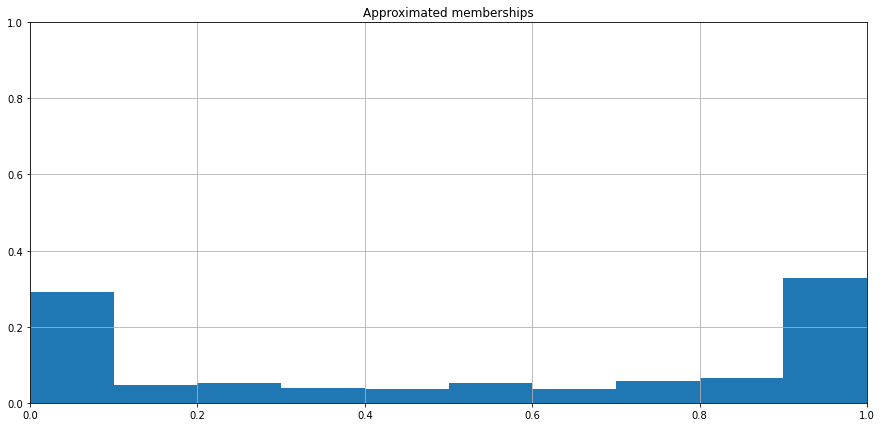

In [72]:
plot_hist(total_data["approximated memberships"])

plt.title("Approximated memberships")
plt.show()

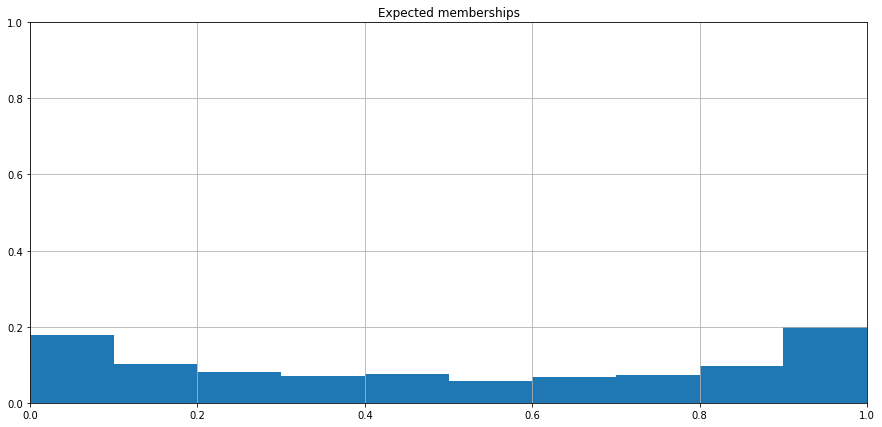

In [73]:
plot_hist(total_data["expected memberships"])

plt.title("Expected memberships")
plt.show()

Training error

In [74]:
RMSE(total_training_data["approximated memberships"], total_training_data["expected memberships"])

0.09684223095363444

Test error

In [75]:
RMSE(total_data["approximated memberships"], total_data["expected memberships"])

0.26527761788531273

In [76]:
for i in select_radius(0.15, 0.5):
    print(i)

(0.42713851827957583, 0.3361680676543479)
(0.519334934106735, 0.4714346939696755)
(0.45345711052005755, 0.3978293784747121)
(0.5611056699965506, 0.49615828356208)
(0.5156056710804239, 0.5065075855397667)
(0.5105503956073894, 0.4524201520262568)
(0.5819227551875196, 0.4869906821781757)
(0.5623185497623936, 0.4757091344619066)
(0.39015505015330065, 0.3278902706836819)
(0.4529626694715486, 0.4108856506138907)
(0.4910861152352304, 0.4359573391500301)
(0.37173954918222574, 0.12502645097255052)
(0.4735170478904621, 0.9950044119735216)
(0.37249969099842983, 0.9943939929603944)
(0.4629564818707915, 0.7625789515816978)
(0.5164977987807147, 0.4661227026421673)
(0.6489784280550972, 0.5303409616874564)
(0.48344296881369675, 0.4366110986808786)
(0.3588201222640879, 0.3882246971734243)
(0.4738980566137255, 0.473935612799885)
(0.5376853451846615, 0.5390064830145026)
(0.5692792296422051, 0.4863043122081826)
(0.6460579863868524, 0.572467499873186)
(0.5949709317540789, 0.5101164540262301)
(0.58646528926

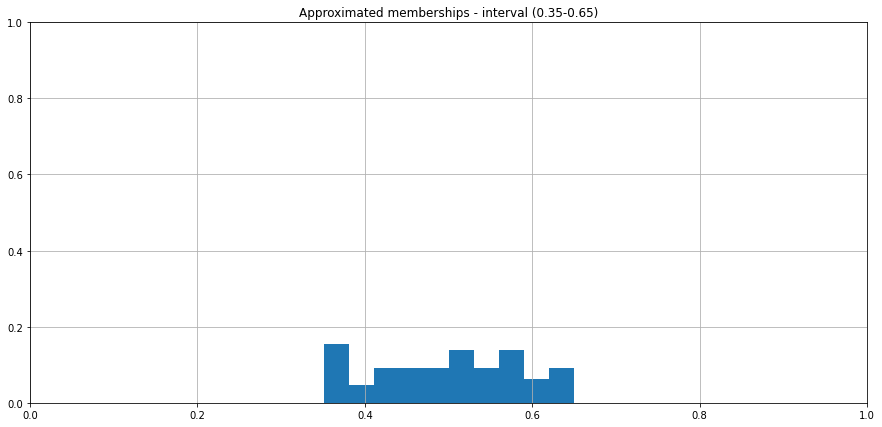

In [77]:
plot_hist([x[0] for x in select_radius(0.15, 0.5)])

plt.title("Approximated memberships - interval (0.35-0.65)")
plt.show()

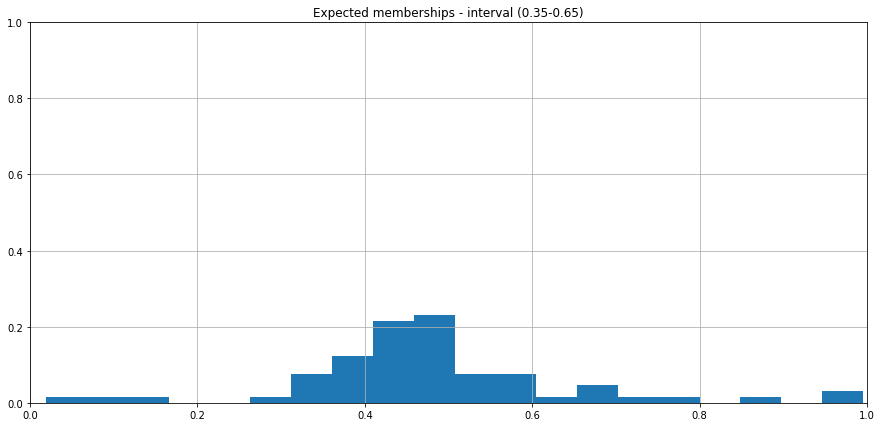

In [78]:
data = [x[1] for x in select_radius(0.15, 0.5)]
plt.figure(figsize=(15, 7))
weights = np.ones_like(data)/float(len(data))
binwidth = (max(data) - min(data)) / 10
plt.hist(data, bins=20, weights=weights)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Expected memberships - interval (0.35-0.65)")
plt.grid()

In [79]:
recap = pd.DataFrame([[x[0], x[1]] for x in select_radius(0.15, 0.5)], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.1779930451638582

# Baseline (Random Forest) - overlay

In [80]:
best_grid = [
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=300, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42)
]

In [81]:
# random_forest = RandomForestRegressor(random_state=42)

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# best_grid = []

# rf_pred_train = []
# rf_pred_test = []

# rf_scores_train = []
# rf_scores_test = []

training_predictions = []
test_predictions = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    # Instantiate the grid search model
    # gs = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2)
    # gs.fit(X_train, y_train)
    
    # y_pred_train = gs.best_estimator_.predict(X_train)
    # y_pred_test = gs.best_estimator_.predict(X_test)
    
    # best_grid.append(gs.best_estimator_)
    # rf_pred_train.append(y_pred_train)
    # rf_pred_test.append(y_pred_test)
    
    # rf_scores_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    # rf_scores_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    best_grid[i].fit(X_train, y_train)
    
    training_predictions.append((best_grid[i].predict(X_train), X_train))
    test_predictions.append((best_grid[i].predict(X_test), X_test))
    
# print("Training error: ", np.mean(rf_scores_train))
# print("Test error: ", np.mean(rf_scores_test))

In [82]:
for i in best_grid:
    print(i.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 2, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, '

In [83]:
baseline_train_predictions = []
baseline_test_predictions = []
baseline_train_data = []
baseline_test_data = []

for i in training_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_train_predictions.append(j)
        baseline_train_data.append(k)
        
for i in test_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_test_predictions.append(j)
        baseline_test_data.append(k)
        
baseline_train = pd.DataFrame(columns=["x", "baseline training memberships"])
baseline_train["x"] = baseline_train_data
baseline_train["baseline training memberships"] = baseline_train_predictions
baseline_train["x"] = baseline_train["x"].apply(lambda s: tuple(s))
baseline_train = baseline_train.drop_duplicates(subset=['x'])
baseline_train["expected memberships"] = total_training_data["expected memberships"]

baseline_test = pd.DataFrame(columns=["x", "baseline test memberships"])
baseline_test["x"] = baseline_test_data
baseline_test["baseline test memberships"] = baseline_test_predictions
baseline_test["x"] = baseline_test["x"].apply(lambda s: tuple(s))
baseline_test = baseline_test.drop_duplicates(subset=['x'])
baseline_test["expected memberships"] = total_data["expected memberships"]

Training error

In [84]:
RMSE(baseline_train["baseline training memberships"], baseline_train["expected memberships"])

0.20357559086800664

Test error

In [85]:
RMSE(baseline_test["baseline test memberships"], baseline_test["expected memberships"])

0.3208930019236118

In [86]:
special_range = [(base[1], base[2]) for x, base in baseline_test.iterrows() if base[1] <= 0.65 and base[1] >= 0.35]
recap = pd.DataFrame([[x[0], x[1]] for x in special_range], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.15971341245289428